In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np

from thesispy.elastix_wrapper.runner import run
from thesispy.elastix_wrapper.parameters import Parameters, Collection
from thesispy.elastix_wrapper.wrapper import get_run_result_mo, generate_transformed_points, get_np_array
from thesispy.experiments.validation import dvf_rmse

from thesispy.definitions import *

In [2]:
mo_out_dir = Path("/home/joasiee/Documents/projects/elastix/experiments/output/1680916228_synthetic_1_mogomea_645377/out")
run_result = get_run_result_mo(Collection.SYNTHETIC, 1, mo_out_dir)

dvf_rmes = []

temp_out_dir = TemporaryDirectory()

for result in run_result.approximation_set:
    generate_transformed_points(result.transform_params, Path(temp_out_dir.name), moving_img_path=run_result.instance.moving_path)
    dvf = get_np_array(Path(temp_out_dir.name) / "deformationField.mhd")
    mask = np.linalg.norm(result.instance.dvf, axis=-1) > 0
    dvf[~mask] = np.array([0 for _ in range(dvf.shape[-1])])
    dvf_rmes.append(dvf_rmse(dvf, run_result.instance.dvf))

2023-04-12 02:34:23,386 - Validation - INFO - DVF RMSE: 0.5986534049219808
2023-04-12 02:34:23,432 - Validation - INFO - DVF RMSE: 0.4666687732126665
2023-04-12 02:34:23,477 - Validation - INFO - DVF RMSE: 0.5933454248760563
2023-04-12 02:34:23,522 - Validation - INFO - DVF RMSE: 0.45738711421663786
2023-04-12 02:34:23,567 - Validation - INFO - DVF RMSE: 0.5101810267828399
2023-04-12 02:34:23,611 - Validation - INFO - DVF RMSE: 0.6034958109123001
2023-04-12 02:34:23,655 - Validation - INFO - DVF RMSE: 0.5901765033690477
2023-04-12 02:34:23,700 - Validation - INFO - DVF RMSE: 0.5994986413720332
2023-04-12 02:34:23,746 - Validation - INFO - DVF RMSE: 0.5573663945759653
2023-04-12 02:34:23,790 - Validation - INFO - DVF RMSE: 0.595922013571547
2023-04-12 02:34:23,835 - Validation - INFO - DVF RMSE: 0.6027676956876418
2023-04-12 02:34:23,880 - Validation - INFO - DVF RMSE: 0.6009585242307223
2023-04-12 02:34:23,925 - Validation - INFO - DVF RMSE: 0.5829645148887558
2023-04-12 02:34:23,972 -

In [5]:
min(dvf_rmes), max(dvf_rmes)

(0.45738711421663786, 0.6089381331521369)

Text(0, 0.5, 'Bending energy')

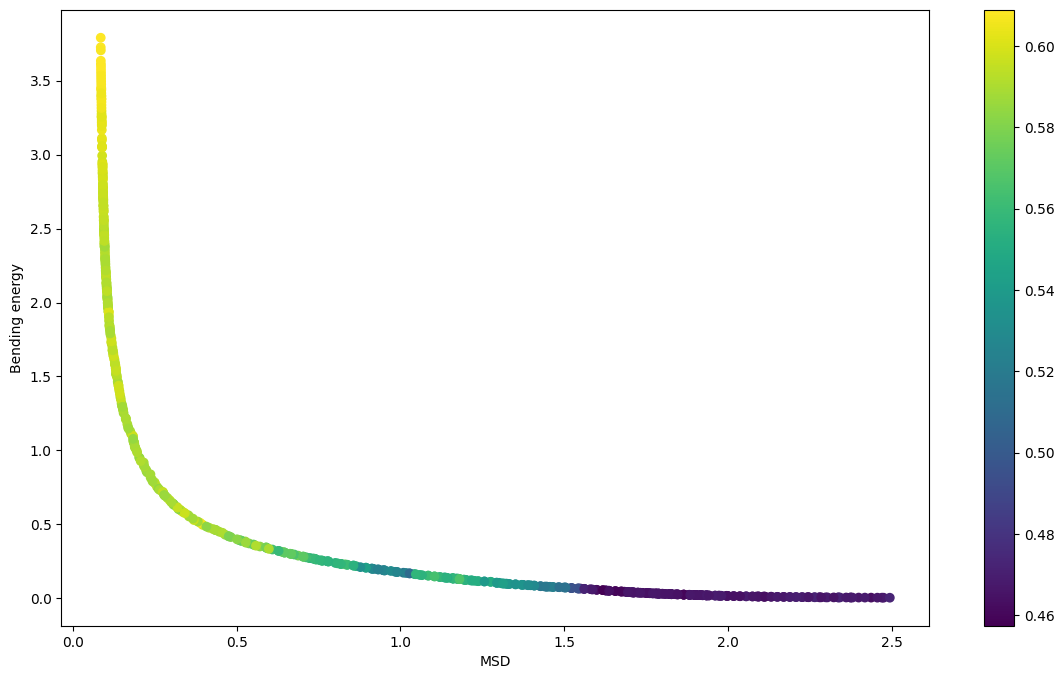

In [12]:
plt.figure(figsize=(14, 8))
plt.scatter(run_result.objective_values[:, 0], run_result.objective_values[:, 1], c=dvf_rmes)
plt.colorbar()
plt.xlabel("MSD")
plt.ylabel("Bending energy")

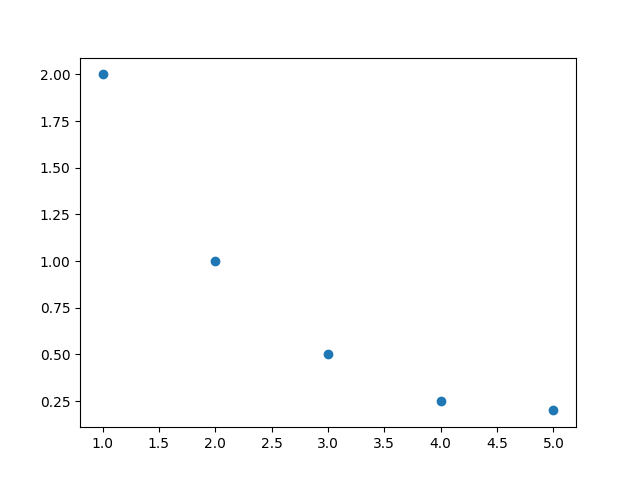

/home/joasiee/Documents/projects/elastix/experiments/.venv/lib/python3.10/site-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


Clicked on point (4.0112903225806456, 0.2664285714285714)


AttributeError: 'NoneType' object has no attribute 'canvas'

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import mplcursors

# Set the backend to Qt5Agg
plt.switch_backend('Qt5Agg')

# Example Pareto front
front = [(1, 2), (2, 1), (3, 0.5), (4, 0.25), (5, 0.2)]

# Define function to execute when a point is clicked
def onclick(event):
    x, y = event.xdata, event.ydata
    print(f"Clicked on point ({x}, {y})")

# Create the plot
fig, ax = plt.subplots()
scatter = ax.scatter([p[0] for p in front], [p[1] for p in front])
labels = [f"({p[0]}, {p[1]})" for p in front]

# Add labels on hover
cursor = mplcursors.cursor(scatter, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    label = labels[index]
    sel.annotation.set_text(label)

# Set up the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()